In [2]:
import pandas as pd

In [3]:
pfizer = pd.read_csv("../data/Australia/pfizer.csv")
pfizer.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
pfizer

,Text
0,@prudinx I had Pfizer. Pretty much the same de...
1,@bittern36921585 @CNCIB @abcnews The creator w...
2,"Didn't Albert Bourla aka Pfizer CEO, already s..."
3,For anyone wanting to read the released docume...
4,@mikeymikester @abcnews So Pfizer etc won’t re...
...,...
12346,Wow.\n\nBritain approves Pfizer-BioNTech COVID...
12347,#BREAKING The UK has become the first country ...
12348,Wow 👏👏👏 @RackMada @horowitz_b @markfebbraio \n...
12349,GOOD MORNING TO THE UK ONLY!!!!!! Pop the Pfiz...


In [4]:
astrazeneca = pd.read_csv("../data/Australia/astrazeneca.csv")
astrazeneca.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
astrazeneca

,Text
0,Finally the TGA has approved the Astrazeneca b...
1,COVID: AstraZeneca booster approved for adults...
2,So I’m uptodate as I’ve had my third shot ….....
3,AstraZeneca falls to loss despite Covid vaccin...
4,TGA อนุมัติ AstraZeneca เป็นวัคซีนบูสเตอร์เข็ม...
...,...
3359,OXFORD + RUSSIA VACCINES TO TEST COMBINED VACC...
3360,$AZN.PLC Astrazeneca Says Signed Final Agreeme...
3361,9 out of 10 people in poor countries are going...
3362,"And there it is, the first vaccine developer @..."


In [5]:
pfizer_text_list = pfizer['Text'].tolist()

pfizer_text_list

['@prudinx I had Pfizer. Pretty much the same deal as Moderna, by the sound of things.',
 '@bittern36921585 @CNCIB @abcnews The creator won a Nobel prize for its use in humans. It has been used in high dose to treat other covid virus’s. Show me the data on the vaccine? Oh that’s right Pfizer won’t release it. We are just trusting them. At least there are studies done on ivermectin.',
 "Didn't Albert Bourla aka Pfizer CEO, already say that the vax doesn't work against Omicron...they might start labelling him with the same pejorative soon enough! https://t.co/TjF3fixeKx",
 'For anyone wanting to read the released documents following the court ruling of the FOIA against Pfizer it is all being uploaded to the following website https://t.co/e0Zv88LtCh',
 '@mikeymikester @abcnews So Pfizer etc won’t release the data for the vaccinations, they have no long term data for side effects, have told a court in the US they won’t release the trial data for 55 years and the ABC writes an article debat

In [6]:
import numpy as np
import re

In [18]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from",  "vaccine", "covid", "pfizer", "moderna", "astrazaneca", "vaccines","vaccinated","vaccination", "day", "az", "night", "amp", "pm", "am", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [12]:
pfizer_cleaned_tweets = [clean_tweet(tw) for tw in pfizer_text_list]
pfizer_cleaned_tweets

<ipython-input-11-2f82748fba1f>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['i had pretty much same deal as by sound things',
 'creator won nobel prize its use humans it has been used high dose treat other virus s show me data oh that s right won t release it we are just trusting them at least there are studies done ivermectin',
 'didnt albert bourla aka ceo already say that vax doesnt work against omicron they might start labelling him with same pejorative soon enough',
 'anyone wanting read released documents following court ruling foia against it is all being uploaded following website',
 'so etc won t release data vaccinations they have no long term data side effects have told court us they won t release trial data 55 years abc writes article debating lack trial data hilarious',
 'bunnings team up with',
 'blow darts are blue is red durrr',
 'why do you even care about them there are only 5 them nz if there were no passes like abroad where they are cancelling them hospitalisation would increase by negligible maximum 2 3 given 40 decline hospitalisation ri

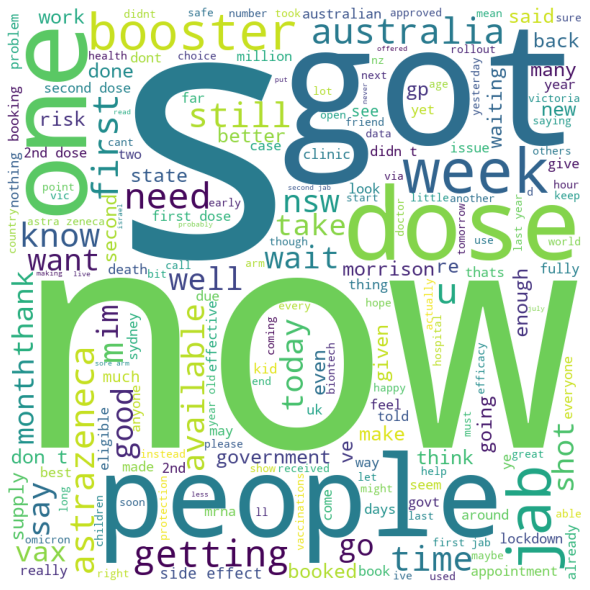

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in pfizer_cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [19]:
astrazeneca_text_list = astrazeneca['Text'].tolist()

astrazeneca_text_list

['Finally the TGA has approved the Astrazeneca booster now i can actually get one',
 'COVID: AstraZeneca booster approved for adults | The New Daily https://t.co/AIS1237m8x',
 'So I’m uptodate  as I’ve had my third shot ….. as expected by the powers that be however anyone coming from overseas only needs two jabs…. what about those from overseas with two jabs of AstraZeneca and they get sick here ?',
 'AstraZeneca falls to loss despite Covid vaccine sales of £3bn https://t.co/Z87t1H3y97',
 'TGA อนุมัติ AstraZeneca เป็นวัคซีนบูสเตอร์เข็มสาม https://t.co/vDh4iq7COT',
 'Yet another "coincidence". And #astrazeneca still calls their jab "safe and effective"?\n#VaccineSideEffects #CovidVaccine #bloodclots https://t.co/87xKalxtLq',
 'Even Astrazeneca admitted they were killing one in every million victims ⚡️ https://t.co/a9f3BFAgT3',
 'FTSE 100 extends gains on AstraZeneca, mining boost – Business\xa0Recorder https://t.co/rBtAZJriUx',
 'this sudden focus on HIV testing, still isn’t ringing ala

In [20]:
astrazeneca_cleaned_tweets = [clean_tweet(tw) for tw in astrazeneca_text_list]
astrazeneca_cleaned_tweets

<ipython-input-18-4231ca52e1ef>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['finally tga has approved astrazeneca booster now i can actually get one',
 'astrazeneca booster approved adults new daily',
 'so i m uptodate as i ve had my third shot as expected by powers that be however anyone coming overseas only needs two jabs what about those overseas with two jabs astrazeneca they get sick here',
 'astrazeneca falls loss despite sales 3bn',
 'tga astrazeneca',
 'yet another coincidence still calls their jab safe effective',
 'even astrazeneca admitted they were killing one every million victims',
 'ftse 100 extends gains astrazeneca mining boost business recorder',
 'this sudden focus hiv testing still isn t ringing alarm bells with people you re healthy you re not using dirty needles you re not having unprotected sex with strangers how d you get aids then',
 'were being told get our booster shots tonight theres another table therapeutic goods administration has now provisionally approved astrazeneca shot as booster over 18s consultation with doctor',
 'tga ha

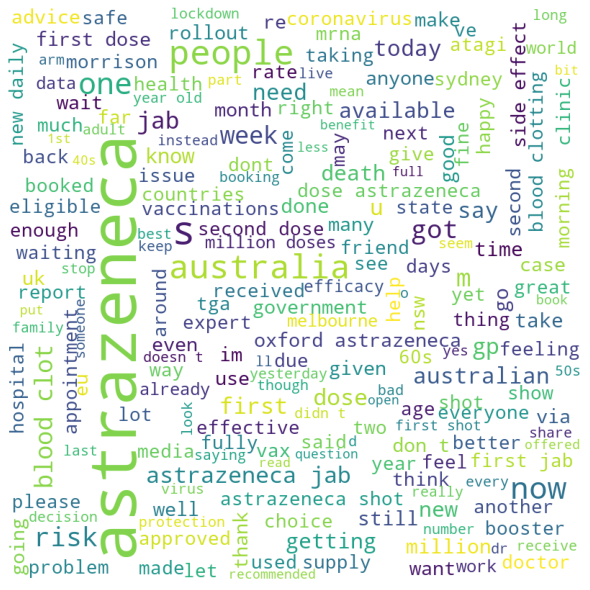

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in astrazeneca_cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()